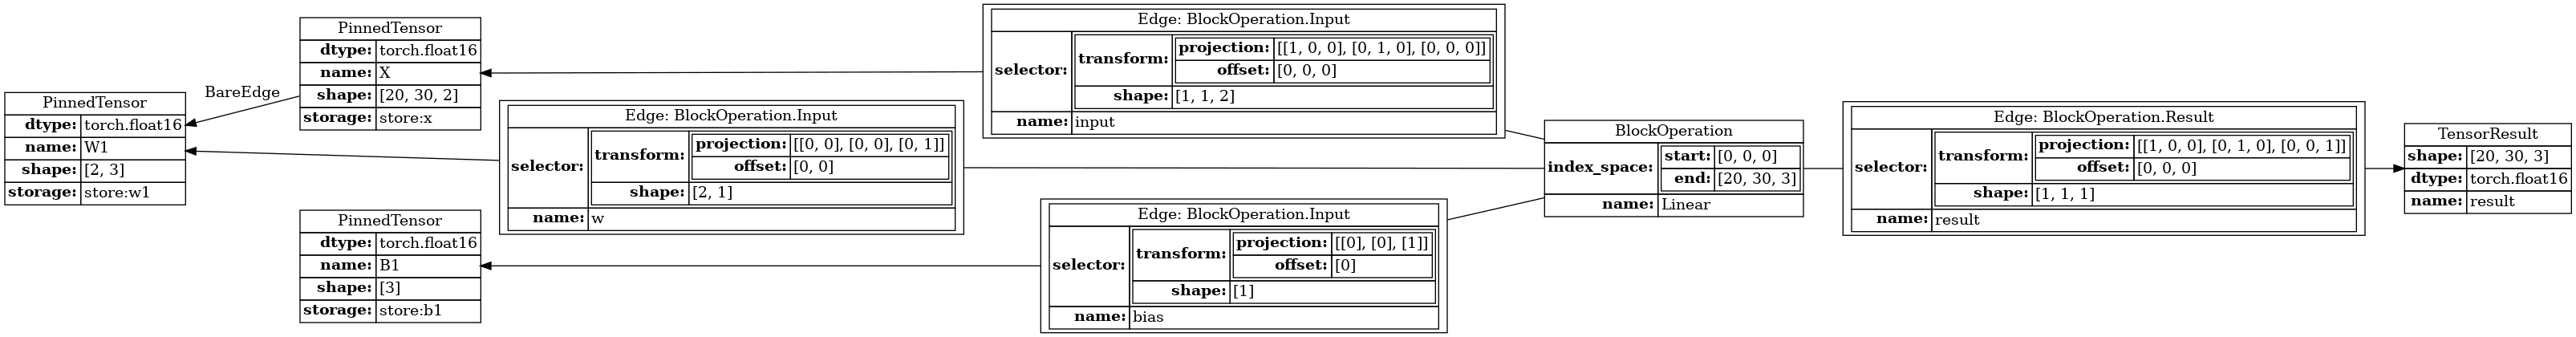

In [1]:
from dataclasses import dataclass

import marshmallow_dataclass

from tapestry.expression_graph import TapestryEdge
from tapestry.jupyter_utils import display_graph
from tapestry.raw_edge import raw
from tapestry.serialization.json_serializable import JsonLoadable


@marshmallow_dataclass.add_schema
@dataclass(kw_only=True)
class BareEdge(TapestryEdge):
    class EdgeMeta(TapestryEdge.EdgeMeta):
        DISPLAY_ATTRIBUTES = False


g = raw()
a, b = g.list_nodes()[:2]

g.add_node(
    BareEdge(
        source_id=a.node_id,
        target_id=b.node_id,
    )
)


display_graph(g)